<a href="https://colab.research.google.com/github/johnyacho/NewsProjects/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering K-means

In [ ]:
import pandas as pd

nba= pd.read_csv('/content/nba_2013.csv')
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [ ]:
# explorer les donnees du dataset
# nba.info()

In [ ]:
# nouveau dataframe qui contient uniquement les meneurs de jeu PG
meneurs = nba[nba['pos'] == 'PG']
meneurs
# meneurs.isnull().sum()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,133,332,0.400602,165,386,0.427461,0.508,201,227,0.885,15,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,7,25,0.280000,49,106,0.462264,0.454,31,39,0.795,5,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,73,231,0.316017,181,425,0.425882,0.443,79,100,0.790,16,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,76,212,0.358491,172,405,0.424691,0.464,94,118,0.797,22,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,79,210,0.376190,54,143,0.377622,0.489,33,43,0.767,13,146,159,307,54,8,102,85,378,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Russell Westbrook,PG,25,OKC,46,46,1412,346,791,0.437,68,214,0.317757,278,577,0.481802,0.480,242,293,0.826,55,208,263,319,88,7,177,104,1002,2013-2014,2013
462,Deron Williams,PG,29,BRK,64,58,2059,322,716,0.450,98,268,0.365672,224,448,0.500000,0.518,173,216,0.801,15,153,168,392,93,13,143,148,915,2013-2014,2013
465,Louis Williams,PG,27,ATL,60,7,1445,197,493,0.400,79,231,0.341991,118,262,0.450382,0.480,152,179,0.849,10,114,124,210,45,4,92,65,625,2013-2014,2013
467,Mo Williams,PG,31,POR,74,0,1834,280,672,0.417,83,225,0.368889,197,447,0.440716,0.478,78,89,0.876,42,111,153,321,55,10,149,197,721,2013-2014,2013


In [ ]:
# calcul de point par match(pts/g) du meneur
ppmatch= meneurs['pts']/ meneurs['g']
meneurs['ppmatch']=ppmatch
# verification 
meneurs[['g', 'pts', 'ppmatch']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,g,pts,ppmatch
24,71,930,13.098592
29,20,150,7.500000
30,79,660,8.354430
38,72,666,9.250000
50,55,378,6.872727


## Ratio passe décisive - perte de balle

In [ ]:
# suprimmer les joueur qui ont 0 turnover(tov)
meneurs = meneurs[meneurs['tov'] != 0]
# afficher toutes les colonnes
# pd.set_option('display.max_columns', None)
meneurs

# Assist Turnover Ratio (atr) = ast/tov
meneurs['atr']=meneurs['ast']/meneurs['tov']
meneurs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,ppmatch,atr
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,133,332,0.400602,165,386,0.427461,0.508,201,227,0.885,15,115,130,313,53,3,125,147,930,2013-2014,2013,13.098592,2.504000
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,7,25,0.280000,49,106,0.462264,0.454,31,39,0.795,5,32,37,32,7,4,19,30,150,2013-2014,2013,7.500000,1.684211
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,73,231,0.316017,181,425,0.425882,0.443,79,100,0.790,16,138,154,303,26,0,125,129,660,2013-2014,2013,8.354430,2.424000
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,76,212,0.358491,172,405,0.424691,0.464,94,118,0.797,22,123,145,194,60,9,82,161,666,2013-2014,2013,9.250000,2.365854
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,79,210,0.376190,54,143,0.377622,0.489,33,43,0.767,13,146,159,307,54,8,102,85,378,2013-2014,2013,6.872727,3.009804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Russell Westbrook,PG,25,OKC,46,46,1412,346,791,0.437,68,214,0.317757,278,577,0.481802,0.480,242,293,0.826,55,208,263,319,88,7,177,104,1002,2013-2014,2013,21.782609,1.802260
462,Deron Williams,PG,29,BRK,64,58,2059,322,716,0.450,98,268,0.365672,224,448,0.500000,0.518,173,216,0.801,15,153,168,392,93,13,143,148,915,2013-2014,2013,14.296875,2.741259
465,Louis Williams,PG,27,ATL,60,7,1445,197,493,0.400,79,231,0.341991,118,262,0.450382,0.480,152,179,0.849,10,114,124,210,45,4,92,65,625,2013-2014,2013,10.416667,2.282609
467,Mo Williams,PG,31,POR,74,0,1834,280,672,0.417,83,225,0.368889,197,447,0.440716,0.478,78,89,0.876,42,111,153,321,55,10,149,197,721,2013-2014,2013,9.743243,2.154362


<function matplotlib.pyplot.show>

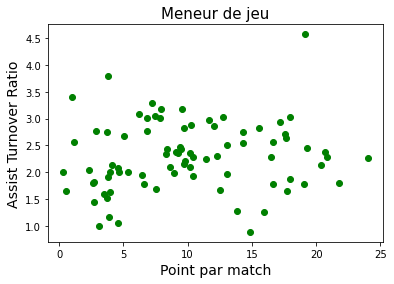

In [ ]:
# visualisation des meneurs de jeu selon le ppmatch et le atr
import matplotlib.pyplot as plt

plt.scatter(meneurs['ppmatch'], meneurs['atr'], c='g')
plt.title('Meneur de jeu', fontsize= 15)
plt.xlabel('Point par match', fontsize= 14)
plt.ylabel('Assist Turnover Ratio', fontsize= 14)
plt.show

[278 204 280 420  71]


Text(0.5, 1.0, 'Meneur de jeu')

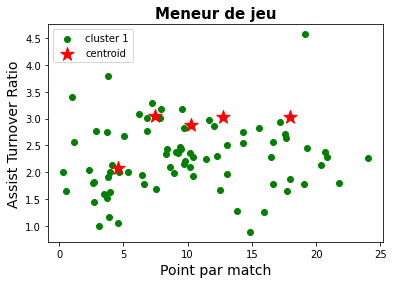

In [ ]:
# Algorithme KMean nb_cluster =5
import numpy as np
nb_cluster = 5
# generer des 5 points d'index aleatoire
random_index_points = np.random.choice(meneurs.index, size=nb_cluster)
print(random_index_points)

centroide = meneurs.loc[random_index_points]
# Visualiser les donnees selon le centroide
plt.scatter(meneurs['ppmatch'], meneurs['atr'], c='g', label='cluster 1')
plt.scatter(centroide['ppmatch'], centroide['atr'], marker='*', s=200,
            c='r', label='centroid')
plt.legend()
plt.xlabel('Point par match', fontsize= 14)
plt.ylabel('Assist Turnover Ratio', fontsize= 14)
plt.title('Meneur de jeu', fontsize= 15, fontweight='bold')

In [ ]:
# fonction pour generer un dictionnaire de centroide
# Clé: cluster_id
# Valeur: liste de coordonnées du centroïde correspondant
def centroid_dict(centroide):
  dictionnaire = dict()
  cpt = 0

  # iterer sur un dataFrame
  for index in centroide.iterrows():
    coordonnee = [centroide['ppmatch'], centroide['atr']]
    dictionnaire[cpt] = coordonnee
    cpt+=1
  return dictionnaire  
